# Cal Sports Project - GO BEARS


### By Alex Lee

In [37]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import helper_functions
import plotly.express as px

## EDA

All data has been collected from the Cal football website (https://calbears.com/sports/football/stats) and has been formatted into a compatible format (csv). The first dataset, team, contains season totals offensively and defensively for each year under Justin Wilcox. The wilcox_record dataset contains total wins and losses data and corresponding conference records each year under Wilcox. Individual game stats have also been collected in for the 2023 season up through the Oregon game (Week 10).

In [4]:
team_temp = pd.read_csv("datasets/team_stats_wilcox.csv")
team_temp.head(10)

,Years,Cal 2023,Opponent 2023,Cal 2022,Opponent 2022,Cal 2021,Opponent 2021,Cal 2020,Opponent 2020,Cal 2019,Opponent 2019,Cal 2018,Opponent 2018,Cal 2017,Opponent 2017
0,Points Per Game,30.78,36.78,23.92,27.83,23.75,22.25,20.25,26.5,21.23,21.92,21.54,20.38,27.75,28.42
1,Total,277,331,287,334,285,267,81,106,276,285,280,265,333,341
2,Rushing First Downs,84,71,68,107,101,108,23,34,104,99,111,106,96,116
3,Passing First Downs,95,101,139,162,111,124,37,35,105,158,113,103,139,136
4,Penalty First Downs,23,8,24,12,16,23,13,5,35,15,27,18,30,17
5,Total First Downs,202,180,231,281,228,255,73,74,244,272,251,227,265,269
6,Rushing Yards Gained,1903,1491,1501,2005,2211,1940,623,739,2131,1980,2314,2206,1912,2301
7,Rushing Yards Lost,192,180,342,210,241,299,122,62,421,338,269,359,405,332
8,Rushing Attempts,350,322,319,426,402,418,148,153,476,461,487,511,416,475
9,Rushing Average Per Attempt,4.9,4.1,3.6,4.2,4.9,3.9,3.4,4.4,3.6,3.6,4.2,3.6,3.6,4.1


In [5]:
team_temp.set_index("Years", inplace=True)
team = team_temp.T
team.head(5)

Years,Points Per Game,Total,Rushing First Downs,Passing First Downs,Penalty First Downs,Total First Downs,Rushing Yards Gained,Rushing Yards Lost,Rushing Attempts,Rushing Average Per Attempt,...,Avg. TOP Per Game,Total TOP,3rd Down Conversions,4th Down Conversions,Fumbles-Lost,Sacks-Yards Lost,PAT: Good-Attempts,Misc. Yards,Red Zone: Attempts-Scores,Red Zone: Touchdowns
Cal 2023,30.78,277,84,95,23,202,1903,192,350,4.9,...,28:30:00,4:16:32,53-135 (39.26 %),12-24 (50.00 %),16-9,10-77,26-29,0,29-38,24-38
Opponent 2023,36.78,331,71,101,8,180,1491,180,322,4.1,...,31:30:00,4:43:28,54-127 (42.52 %),14-24 (58.33 %),17-9,13-125,41-42,0,42-44,35-44
Cal 2022,23.92,287,68,139,24,231,1501,342,319,3.6,...,28:42:00,5:44:30,59-167 (35.33 %),12-22 (54.55 %),11-3,19-110,31-32,0,33-40,24-40
Opponent 2022,27.83,334,107,162,12,281,2005,210,426,4.2,...,31:18:00,6:15:30,66-169 (39.05 %),15-25 (60.00 %),14-7,31-251,39-40,0,39-48,33-48
Cal 2021,23.75,285,101,111,16,228,2211,241,402,4.9,...,30:21:00,6:04:10,67-165 (40.61 %),9-29 (31.03 %),7-2,23-160,31-31,0,32-41,24-41


In [6]:
# Splitting Dfs into offensive and defensive data
offense = team.iloc[::2]
defense = team.iloc[1::2]

In [7]:
wilcox_record = pd.read_csv("datasets/winning_percentage.csv")
wilcox_record

,Year,Wins,Loss,Pct,Conf Wins,Conf Losses,Conf. Pct
0,2023,3,6,0.375000,1,5,0.200000
1,2022,4,8,0.333333,2,7,0.222222
2,2021,5,7,0.416667,4,5,0.444444
3,2020,1,3,0.250000,1,3,0.250000
4,2019,8,5,0.615385,4,5,0.444444
5,2018,7,6,0.538462,4,5,0.444444
6,2017,5,7,0.416667,2,7,0.222222


In [8]:
# Adding win percentage data to offense and defense
offense['Win Pct'] = wilcox_record['Pct'].to_numpy()
defense['Win Pct'] = wilcox_record['Pct'].to_numpy()
offense['Conf. Win Pct'] = wilcox_record['Conf. Pct'].to_numpy()
defense['Conf. Win Pct'] = wilcox_record['Conf. Pct'].to_numpy()
offense.head()

/var/folders/7w/w2959j9d6jd_0gxlxyvjrkdr0000gn/T/ipykernel_48611/3790961202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense['Win Pct'] = wilcox_record['Pct'].to_numpy()
/var/folders/7w/w2959j9d6jd_0gxlxyvjrkdr0000gn/T/ipykernel_48611/3790961202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defense['Win Pct'] = wilcox_record['Pct'].to_numpy()
/var/folders/7w/w2959j9d6jd_0gxlxyvjrkdr0000gn/T/ipykernel_48611/3790961202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

Years,Points Per Game,Total,Rushing First Downs,Passing First Downs,Penalty First Downs,Total First Downs,Rushing Yards Gained,Rushing Yards Lost,Rushing Attempts,Rushing Average Per Attempt,...,3rd Down Conversions,4th Down Conversions,Fumbles-Lost,Sacks-Yards Lost,PAT: Good-Attempts,Misc. Yards,Red Zone: Attempts-Scores,Red Zone: Touchdowns,Win Pct,Conf. Win Pct
Cal 2023,30.78,277,84,95,23,202,1903,192,350,4.9,...,53-135 (39.26 %),12-24 (50.00 %),16-9,10-77,26-29,0,29-38,24-38,0.375000,0.200000
Cal 2022,23.92,287,68,139,24,231,1501,342,319,3.6,...,59-167 (35.33 %),12-22 (54.55 %),11-3,19-110,31-32,0,33-40,24-40,0.333333,0.222222
Cal 2021,23.75,285,101,111,16,228,2211,241,402,4.9,...,67-165 (40.61 %),9-29 (31.03 %),7-2,23-160,31-31,0,32-41,24-41,0.416667,0.444444
Cal 2020,20.25,81,23,37,13,73,623,122,148,3.4,...,25-67 (37.31 %),4-8 (50.00 %),4-2,7-31,9-10,0,11-14,8-14,0.250000,0.250000
Cal 2019,21.23,276,104,105,35,244,2131,421,476,3.6,...,65-173 (37.57 %),6-16 (37.50 %),11-4,36-228,33-34,0,30-35,25-35,0.615385,0.444444


In [30]:
game_stats_2023_partial = pd.read_csv("datasets/game_stats_partial.csv")
game_stats_2023_partial['Red Zone Pct'] = game_stats_2023_partial['Red Zone Scores'] / game_stats_2023_partial['Red Zone Attempts']
game_stats_2023_partial['Opp. Red Zone Pct'] = game_stats_2023_partial['Opp. Red Zone Scores']/ game_stats_2023_partial['Opp. Red Zone Attempts']
game_stats_2023_partial['Red Zone TD Rate'] = (game_stats_2023_partial['Red Zone Rush TD'] + game_stats_2023_partial['Red Zone Pass TD']) / game_stats_2023_partial['Red Zone Attempts']
game_stats_2023_partial['Opp. Red Zone TD Rate'] = (game_stats_2023_partial['Opp. Red Zone Rush TD'] + game_stats_2023_partial['Opp. Red Zone Pass TD']) / game_stats_2023_partial['Opp. Red Zone Attempts']
game_stats_2023_partial

,Date,Opponent,Home,Away,Win,Loss,Point Diff,Rushing ATT,Rushing YDS,Rushing TD,...,Opp. Red Zone Pass TD,Opp. Red Zone FGM,Opp. Red Zone FGA,Opp. Red Zone TO on Downs,Opp. Red Zone INT,Opp. Red Zone FUM,Red Zone Pct,Opp. Red Zone Pct,Red Zone TD Rate,Opp. Red Zone TD Rate
0,09/02/2023,North Texas,0,1,1,0,37,56,357,6,...,2,0,0,0,0,0,0.75,1.000000,0.625000,1.000000
1,09/09/2023,Auburn,1,0,0,1,-4,40,113,1,...,2,0,0,0,0,0,0.25,1.000000,0.250000,1.000000
2,09/16/2023,Idaho,1,0,1,0,14,43,256,2,...,0,1,0,0,0,0,1.00,1.000000,0.666667,0.666667
3,09/23/2023,Washington,0,1,0,1,-27,35,139,2,...,2,0,0,0,0,0,1.00,1.000000,1.000000,1.000000
4,09/30/2023,Arizona St.,1,0,1,0,3,48,196,2,...,0,2,0,0,0,0,0.75,1.000000,0.500000,0.500000
5,10/07/2023,Oregon St.,1,0,0,1,-12,33,240,3,...,5,1,0,0,0,0,1.00,1.000000,0.800000,0.857143
6,10/14/2023,Utah,0,1,0,1,-20,24,66,0,...,0,2,1,0,0,0,0.00,0.833333,0.000000,0.500000
7,10/28/2023,Southern California,1,0,0,1,-1,42,235,5,...,1,1,1,0,0,0,1.00,0.875000,1.000000,0.750000
8,11/04/2023,Oregon,0,1,0,1,-44,29,109,1,...,4,0,0,0,0,0,0.50,1.000000,0.250000,1.000000


In [31]:
# Creating dataframes separating wins and losses in 2023

wins_2023 = game_stats_2023_partial[game_stats_2023_partial['Win'] == 1]
losses_2023 = game_stats_2023_partial[game_stats_2023_partial['Win'] == 0]

### Visualizations and Summary Statistics

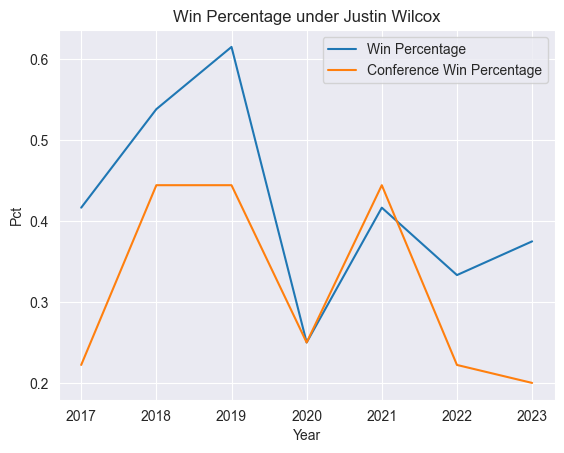

In [32]:
# Line plot of win percentages during wilcox's time
x = ['Year', 'Year']
y = ['Pct', 'Conf. Pct']
dfs = [wilcox_record, wilcox_record]
labels = ['Win Percentage', 'Conference Win Percentage']
helper_functions.plot_line_graph(x, y, dfs, labels, 'Win Percentage under Justin Wilcox')

Summary of statistics between losses and wins. From the eye test, we can see that in games won, Cal has had significantly more success running the ball with an average of almost 270 yards per game versus only 150 yards per game in losses. Interestingly, turnovers forced do not differ a ton between wins and losses. In losses, cal is allowing a 95% redzone score rate (100% in losses) on defense, with 85% of opponent trips to the redzone ending in touchdowns (72% in wins). Offensively, Cal has had a much worse red zone performance averaging a TD on 59% of trips in wins and 55% in losses.

In [33]:
losses_2023.iloc[:, 6:].mean()

Point Diff                   -18.000000
Rushing ATT                   33.833333
Rushing YDS                  150.333333
Rushing TD                     2.000000
Rushing Long                  24.166667
Passing ATT                   21.166667
YDS                          231.166667
Passing TD                     1.500000
Passing Long                  35.666667
Kick Return ATT                2.500000
Kick Return YDS               42.333333
Kick Return TD                 0.000000
Kick Return Long              20.333333
Punt Return ATT                1.000000
Punt Return YDS                4.666667
Punt Return TD                 0.000000
Punt Return Long               3.500000
Solo Tackles                  38.000000
AST Tackles                   34.333333
TOT Tackles                   72.333333
TFL                            3.500000
TFL YDS                       16.500000
TOT Sacks                      1.166667
Sacks YDS                     10.500000
FF                             1.166667


In [34]:
wins_2023.iloc[:, 6:].mean()

Point Diff                    18.000000
Rushing ATT                   49.000000
Rushing YDS                  269.666667
Rushing TD                     3.333333
Rushing Long                  42.333333
Passing ATT                   17.333333
YDS                          188.666667
Passing TD                     1.666667
Passing Long                  33.666667
Kick Return ATT                1.333333
Kick Return YDS               20.666667
Kick Return TD                 0.000000
Kick Return Long              11.666667
Punt Return ATT                0.333333
Punt Return YDS                0.000000
Punt Return TD                 0.000000
Punt Return Long               0.000000
Solo Tackles                  30.666667
AST Tackles                   33.333333
TOT Tackles                   64.000000
TFL                            3.333333
TFL YDS                       12.000000
TOT Sacks                      1.333333
Sacks YDS                      7.666667
FF                             1.333333


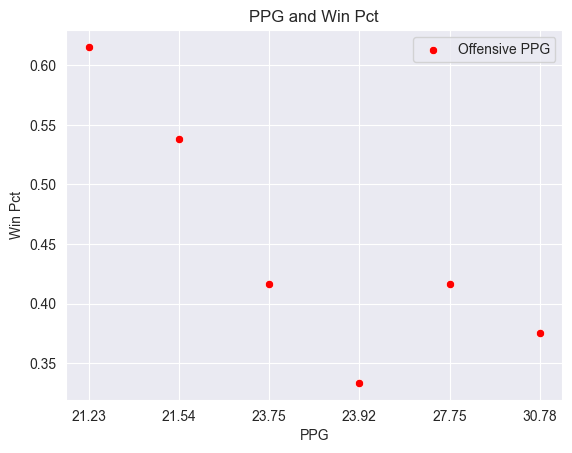

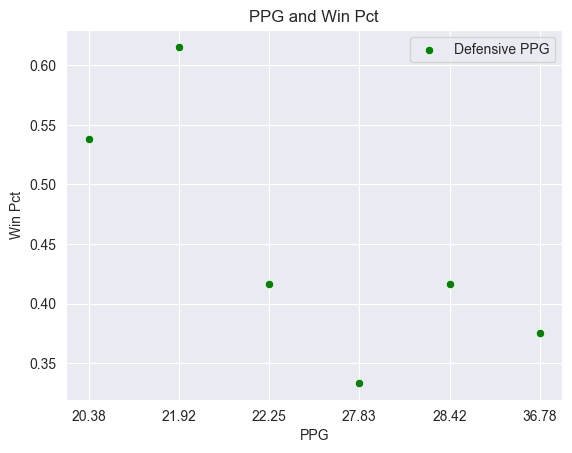

In [59]:
offense_temp = offense.sort_values(by='Points Per Game')
defense_temp = defense.sort_values(by='Points Per Game')
# Remove covid year (Only 4 games)
offense_temp = offense_temp[offense_temp['Win Pct'] != 0.25]
defense_temp = defense_temp[defense_temp['Win Pct'] != 0.25]
dfs = [offense_temp, defense_temp]
x = ['Points Per Game', 'Points Per Game']
y = ['Win Pct', 'Win Pct']
colors = ['red', 'green']
labels = ['Offensive PPG', 'Defensive PPG']


for i in range(len(x)):
    sns.scatterplot(data=dfs[i], x=x[i], y=y[i], label=labels[i], color=colors[i])
    #sns.scatterplot(data=dfs[0], x=x[0], y=y[0], label=labels[0])
    plt.title('PPG and Win Pct')
    plt.legend()
    plt.xlabel('PPG')
    plt.ylabel('Win Pct')
    plt.show()